apply
agg

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel('/content/drive/Othercomputers/vladerm/ML/ml0_2/Вариант 2.xlsx', skiprows=2, skipfooter=1)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1,124,11,Ж,341,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
1,2,128,11,Ж,345,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
2,3,132,11,Ж,340,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
3,4,134,11,Ж,339,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
4,5,136,11,Ж,348,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
...,...,...,...,...,...,...,...,...,...,...,...
2351,2352,136,11,М,337,++++++++++++,2(2)2(2)2(2)3(3)3(3)0(4)1(4),NaN,25,92,27
2352,2353,136,11,М,341,++-+++++++++,2(2)2(2)1(2)2(3)2(3)4(4)1(4),NaN,25,92,27
2353,2354,136,11,М,341,++++++++++++,2(2)1(2)2(2)1(3)3(3)4(4)2(4),NaN,27,96,27
2354,2355,136,11,М,343,++++++++++++,2(2)2(2)2(2)0(3)3(3)4(4)2(4),NaN,27,96,27


2. Сделайте описательную статистику полученных данных.

In [ ]:
df.describe()

,№,№ школы,Номер варианта,Устная часть,Первичный балл,Балл,Минимальный балл
count,2356.000000,2356.000000,2356.000000,0.0,2356.000000,2356.000000,2356.0
mean,1178.500000,132.005518,338.273769,NaN,10.123939,49.255093,27.0
std,680.262939,5.037984,53.660878,NaN,3.820484,17.880420,0.0
min,1.000000,121.000000,101.000000,NaN,1.000000,5.000000,27.0
25%,589.750000,127.000000,339.000000,NaN,7.000000,33.000000,27.0
50%,1178.500000,135.000000,342.500000,NaN,10.000000,50.000000,27.0
75%,1767.250000,136.000000,346.000000,NaN,13.000000,68.000000,27.0
max,2356.000000,137.000000,506.000000,NaN,27.000000,96.000000,27.0


3.
Найдите процент учащихся, выполнивших работу ниже среднего.


In [ ]:
a = df[df["Балл"] < df["Балл"].mean()]
a.shape[0]/df.shape[0]*100

48.00509337860781

4. Найти процент учащихся не сдавших экзамен.

In [ ]:
a = df[df["Балл"] < df["Минимальный балл"]]
prcnt = a.shape[0] / df.shape[0] * 100
prcnt

9.210526315789473

5. Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен.

([<matplotlib.patches.Wedge at 0x7b901ed1ab60>,
 [Text(-1.0542702245174218, 0.3138698674546272, 'passed'),
  Text(1.0542702171707672, -0.31386989213160255, 'failed')])

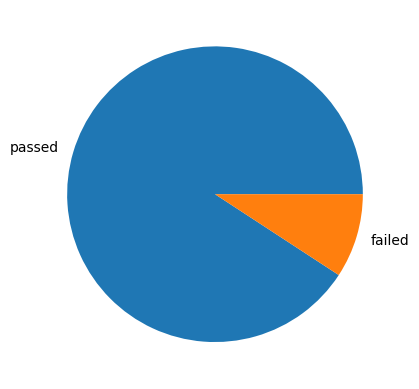

In [ ]:
plt.pie([100-prcnt, prcnt], labels=["passed", "failed"])

Постройте ядерную оценку плотности распределению баллов за экзамен.

<Axes: xlabel='Балл', ylabel='Density'>

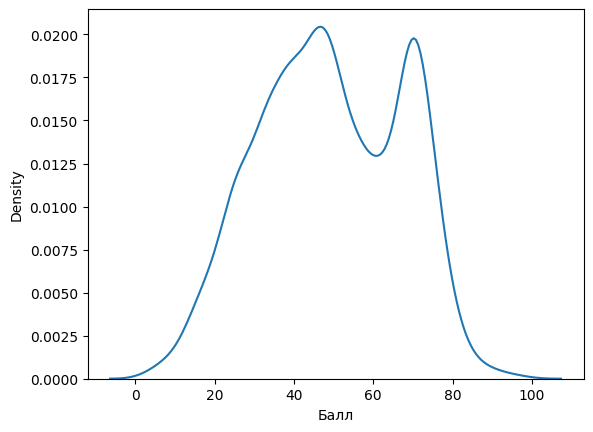

In [ ]:
import seaborn as sns
sns.kdeplot(df['Балл'])

7. Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».

2 < 63

3 63-77

4 76-91

5 > 90



In [ ]:
def foo(series):
    column = []
    for row in series.array:
        column.append(5 if row > 90 else 4 if row > 76 else 3 if row > 63 else 2)
    return column

df['Оценка'] = foo(df['Балл'])
df.groupby(['Оценка']).agg({'Оценка' : 'count'}) / df.shape[0] * 100

,Оценка
Оценка,
2,74.405772
3,22.028862
4,3.353141
5,0.212224


8. Какое процентное соотношение юношей и девушек писало данный экзамен?

In [ ]:
#men = df[df['Пол'] == 'М'].shape[0] / df.shape[0] * 100
#women = df[df['Пол'] == 'Ж'].shape[0] / df.shape[0] * 100
#print(f'Percent of men: {men}, percent of woman: {women}')
df.groupby(["Пол"]).agg({'Пол' : 'count'}) / df.shape[0] * 100


,Пол
Пол,
Ж,52.843803
М,47.156197


9. Сколько школ принимало участие в экзамене?


In [ ]:
len(df["№ школы"].unique())

17

10. Сколько всего заданий с кратким ответом? С развернутым ответом?

In [ ]:
shortAns = len(df.loc[0, 'Задания с кратким ответом'])

11

In [ ]:
import re
longAns = len(re.split(r'\(|\)', df.loc[0, 'Задания с развёрнутым ответом'].rstrip())) // 2
longAns

7

Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В
, ... Вк
 Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В.

In [ ]:
for i in range(shortAns):
    df.insert(len(df.columns), f'B{i+1}', 0)

In [ ]:
for i, _ in df.iterrows():
    shortAns = df.loc[i, 'Задания с кратким ответом']
    for j in range(len(shortAns)):
        df.loc[i, f'B{j+1}'] = shortAns[j]
df

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,...,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12
0,1,124,11,Ж,341,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,-,+,-,-,-,-,-
1,2,128,11,Ж,345,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,-,-,-,-,-,-,-
2,3,132,11,Ж,340,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,-,-,-,-,-,-,-
3,4,134,11,Ж,339,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,-,-,-,-,-,-,-
4,5,136,11,Ж,348,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,-,-,-,+,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,2352,136,11,М,337,++++++++++++,2(2)2(2)2(2)3(3)3(3)0(4)1(4),NaN,25,92,...,+,+,+,+,+,+,+,+,+,+
2352,2353,136,11,М,341,++-+++++++++,2(2)2(2)1(2)2(3)2(3)4(4)1(4),NaN,25,92,...,-,+,+,+,+,+,+,+,+,+
2353,2354,136,11,М,341,++++++++++++,2(2)1(2)2(2)1(3)3(3)4(4)2(4),NaN,27,96,...,+,+,+,+,+,+,+,+,+,+
2354,2355,136,11,М,343,++++++++++++,2(2)2(2)2(2)0(3)3(3)4(4)2(4),NaN,27,96,...,+,+,+,+,+,+,+,+,+,+


In [ ]:
length = df.shape[0] /100
for i in range(df.shape[1] - 11):
    print(f"B{i}: {df.iloc[:, i+11].tolist().count('+') / length}%")


B0: 0.0%
B1: 89.26146010186757%
B2: 95.33106960950765%
B3: 92.78438030560272%
B4: 91.00169779286928%
B5: 88.4974533106961%
B6: 73.1748726655348%
B7: 37.478777589134125%
B8: 47.835314091680814%
B9: 91.85059422750425%
B10: 71.47707979626486%
B11: 59.25297113752123%
B12: 46.222410865874366%


Аналогично и с типом С (ответы с развернутым ответом)

In [ ]:
for i in range(longAns):
    df.insert(len(df.columns), f'C{i+1}', 0)

In [ ]:

for i, _ in df.iterrows():
    longAns = re.split(r'\(|\)', df.loc[i, 'Задания с развёрнутым ответом'])[0:-1:2]
    for j in range(len(longAns)):
        df.loc[i, f'C{j+1}'] = longAns[j]
df


,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,...,B10,B11,B12,C1,C2,C3,C4,C5,C6,C7
0,1,124,11,Ж,341,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,0,0,0,0,0,0,0
1,2,128,11,Ж,345,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,0,0,0,0,0,0,0
2,3,132,11,Ж,340,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,0,0,0,0,0,0,0
3,4,134,11,Ж,339,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,0,0,0,0,0,0,0
4,5,136,11,Ж,348,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,...,-,-,-,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,2352,136,11,М,337,++++++++++++,2(2)2(2)2(2)3(3)3(3)0(4)1(4),NaN,25,92,...,+,+,+,2,2,2,3,3,0,1
2352,2353,136,11,М,341,++-+++++++++,2(2)2(2)1(2)2(3)2(3)4(4)1(4),NaN,25,92,...,+,+,+,2,2,1,2,2,4,1
2353,2354,136,11,М,341,++++++++++++,2(2)1(2)2(2)1(3)3(3)4(4)2(4),NaN,27,96,...,+,+,+,2,1,2,1,3,4,2
2354,2355,136,11,М,343,++++++++++++,2(2)2(2)2(2)0(3)3(3)4(4)2(4),NaN,27,96,...,+,+,+,2,2,2,0,3,4,2


Сделайте анализ по двум школам:
по всем выполненным заданиям типа В

In [ ]:
from random import sample
schools = sample(list(df["№ школы"].unique()), 2)
df1 = df[(df['№ школы'] == schools[0]) | (df['№ школы'] == schools[1])]
a = lambda x: round(x.tolist().count('+') / 11 / len(x.tolist()) * 100, 2)
df1.groupby(['№ школы']).\
agg({'B1' : a, 'B2' : a, 'B3' : a, 'B4' : a, 'B5' : a, 'B6' : a,'B7' : a, 'B8' : a,'B9' : a, 'B10' : a,'B11' : a})

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11
№ школы,,,,,,,,,,,
131,7.82,8.36,7.82,8.18,6.91,7.27,3.82,5.09,9.09,6.36,4.73
132,7.60,8.30,7.87,7.78,7.69,5.42,2.36,4.63,8.04,5.24,4.37


по среднему баллу юношей и девушек

In [ ]:
df1.groupby(['№ школы', 'Пол'])['Балл'].mean()

№ школы  Пол
131      Ж      46.689655
         М      49.809524
132      Ж      39.907407
         М      42.480000
Name: Балл, dtype: float64